In [22]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [3]:
# re-size all the images to this size
# I?ll be careful with these paths, since they are different in my computer.

IMAGE_SIZE = [224,224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer yo the fri
# here we will be using imagenet weights

vgg19 = VGG19(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [5]:
# dont train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [6]:
#useful for getin number of the output classes
folders = glob('Dataset/Train/*')

In [7]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [8]:
#our layers - you can add more if you want

x = Flatten()(vgg19.output)

In [9]:
prediction = Dense(len(folders), activation = 'softmax')(x)

# create a model object
model = Model(inputs = vgg19.input, outputs = prediction)

In [10]:
#view the structure of the model

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
# tell the model what cost and optimization to use
model.compile(
    loss = 'categorical_crossentropy', # i use this cathegorical crossentropy cause' im having 2 nodes
    optimizer = 'adam',
    metrics = ['accuracy'] #i use an accuracy matrix because is a categorization problem
)

In [12]:
#Use the image data generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
#make sure you provide the same target size as initilized for the image
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                target_size = (224, 224),
                                                batch_size = 32,
                                                class_mode= 'categorical')

Found 416 images belonging to 2 classes.


In [14]:
training_set

In [15]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                           target_size = (224, 224),
                                           batch_size = 32, #in each iteration, the program will analyze 32 images. must be low to not destroy the RAM
                                           class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [20]:
#fit the model
# run the cell. it will take some time to execute

%time 
r = model.fit(training_set,validation_data=test_set,epochs=2,
                    steps_per_epoch=len(training_set),validation_steps=len(test_set))

Wall time: 0 ns
Epoch 1/2
13/13 [==============================] - 143s 11s/step - loss: 1.6674 - accuracy: 0.5024 - val_loss: 0.9128 - val_accuracy: 0.6791
Epoch 2/2
13/13 [==============================] - 142s 11s/step - loss: 0.8046 - accuracy: 0.6418 - val_loss: 0.7902 - val_accuracy: 0.5970


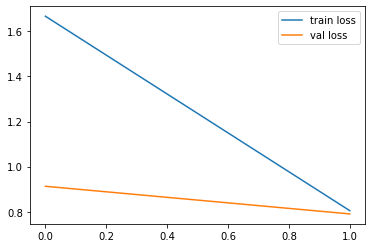

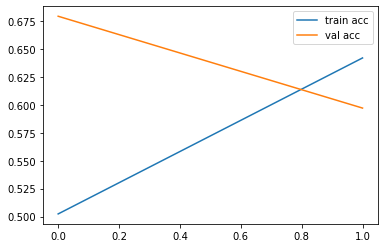

<Figure size 432x288 with 0 Axes>

In [23]:
#plot theloss
plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot accuracy
plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_loss')

In [24]:
#sae it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [26]:
y_pred = model.predict(test_set)

In [27]:
y_pred

array([[0.80628   , 0.19372004],
       [0.1437124 , 0.8562876 ],
       [0.5585962 , 0.44140378],
       [0.12720339, 0.8727966 ],
       [0.5862629 , 0.41373712],
       [0.548105  , 0.451895  ],
       [0.17816165, 0.8218384 ],
       [0.72842085, 0.27157912],
       [0.06599832, 0.9340017 ],
       [0.11429308, 0.8857069 ],
       [0.37308297, 0.626917  ],
       [0.2948757 , 0.70512426],
       [0.14431377, 0.85568625],
       [0.20581014, 0.7941899 ],
       [0.8914358 , 0.10856418],
       [0.3049796 , 0.6950204 ],
       [0.12055575, 0.87944424],
       [0.30514908, 0.6948509 ],
       [0.57828665, 0.42171338],
       [0.17240278, 0.8275972 ],
       [0.4741815 , 0.52581847],
       [0.18884553, 0.8111544 ],
       [0.6104607 , 0.38953924],
       [0.2189018 , 0.7810982 ],
       [0.25805426, 0.74194574],
       [0.23396917, 0.7660308 ],
       [0.05720025, 0.94279975],
       [0.07270847, 0.9272916 ],
       [0.07410707, 0.925893  ],
       [0.8570092 , 0.14299084],
       [0.

In [28]:
import numpy as np

y_pred = np.argmax(y_pred, axis = 1)

In [30]:
y_pred

# 0 means infected, 1 non infected with malaria

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1], dtype=int64)

In [32]:
#these two allow me to: 1) load the model I created 2) understand images

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [33]:
model = load_model('model_vgg19.h5')

In [39]:
# i choose one of the images of the train folder

img = image.load_img('Dataset/Train/Parasite/C33P1thinF_IMG_20150619_114756a_cell_179.png', target_size = (224,224))

In [40]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [41]:
x.shape

(224, 224, 3)

In [42]:
x= x/255

In [43]:
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [46]:
model.predict(img_data)

array([[0.2305139 , 0.76948607]], dtype=float32)

In [47]:
a = np.argmax(model.predict(img_data), axis = 1)

In [48]:
if (a==1):
    print('uninfected')
else:
    print('infected')

uninfected
